<a href="https://colab.research.google.com/github/monsegutier/Grupo4-PP1--Proyecto-ML/blob/Pycaret/Ataques_Cardiacos_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data= pd.read_csv ("/content/heart.csv")

In [ ]:
data.shape

(303, 14)

In [ ]:
!pip install pycaret

In [ ]:
import pycaret
pycaret.__version__

'3.1.0'

In [ ]:
pip install mlflow

In [ ]:
# import pycaret classification and init setup train test split 80/20, normalización:minmax
from pycaret.classification import *
s = setup(data, target='Diagnostico', session_id=123, log_experiment=True, experiment_name='Ataques cardiacos',
          fix_imbalance=True, normalize=True, normalize_method='zscore', train_size=0.8)


,Description,Value
0,Session id,123
1,Target,Diagnostico
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(325, 14)"
5,Transformed train set shape,"(264, 14)"
6,Transformed test set shape,"(61, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [ ]:
# init setup on exp
exp.setup(data, target = 'Diagnostico', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Diagnostico
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(303, 14)"
5,Transformed train set shape,"(212, 14)"
6,Transformed test set shape,"(91, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8307,0.9046,0.8951,0.8181,0.8522,0.6550,0.6647,1.2090
nb,Naive Bayes,0.8263,0.9043,0.8495,0.8409,0.8404,0.6499,0.6589,0.0830
ridge,Ridge Classifier,0.8263,0.0000,0.9022,0.8079,0.8501,0.6454,0.6565,0.0690
lda,Linear Discriminant Analysis,0.8263,0.9041,0.9022,0.8079,0.8501,0.6454,0.6565,0.0510
et,Extra Trees Classifier,0.8187,0.8972,0.8275,0.8464,0.8313,0.6353,0.6440,0.2000
rf,Random Forest Classifier,0.7977,0.9020,0.8044,0.8356,0.8109,0.5931,0.6061,0.2880
ada,Ada Boost Classifier,0.7977,0.8475,0.8198,0.8176,0.8133,0.5927,0.6003,0.2850
svm,SVM - Linear Kernel,0.7975,0.0000,0.8258,0.8132,0.8167,0.5903,0.5949,0.0850
lightgbm,Light Gradient Boosting Machine,0.7933,0.8717,0.8264,0.8143,0.8126,0.5817,0.5956,0.1450
qda,Quadratic Discriminant Analysis,0.7897,0.8741,0.8121,0.8090,0.8028,0.5775,0.5877,0.0790


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# compare models using OOP Usar OOP en la comparación de modelos en PyCaret puede ser especialmente útil cuando necesitas automatizar la selección y evaluación de modelos en diferentes escenarios o para diferentes conjuntos de datos

exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8201,0.9212,0.8576,0.8186,0.8303,0.6358,0.6510,0.0590
ridge,Ridge Classifier,0.8201,0.0000,0.8841,0.8069,0.8359,0.6346,0.6558,0.0310
rf,Random Forest Classifier,0.8201,0.8924,0.8583,0.8236,0.8335,0.6349,0.6474,0.2140
lda,Linear Discriminant Analysis,0.8201,0.9162,0.8841,0.8069,0.8359,0.6346,0.6558,0.0310
lr,Logistic Regression,0.8154,0.9180,0.8750,0.8061,0.8310,0.6245,0.6463,0.2180
et,Extra Trees Classifier,0.8108,0.9003,0.8508,0.8150,0.8240,0.6180,0.6342,0.1830
qda,Quadratic Discriminant Analysis,0.8013,0.9013,0.8152,0.8273,0.8112,0.5986,0.6111,0.0310
gbc,Gradient Boosting Classifier,0.7972,0.8802,0.8152,0.8122,0.8084,0.5900,0.5992,0.1140
xgboost,Extreme Gradient Boosting,0.7970,0.8618,0.8417,0.8072,0.8137,0.5875,0.6070,0.1210
lightgbm,Light Gradient Boosting Machine,0.7872,0.8706,0.8152,0.8199,0.8024,0.5683,0.5907,0.2850


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)

Análisis del Modelo

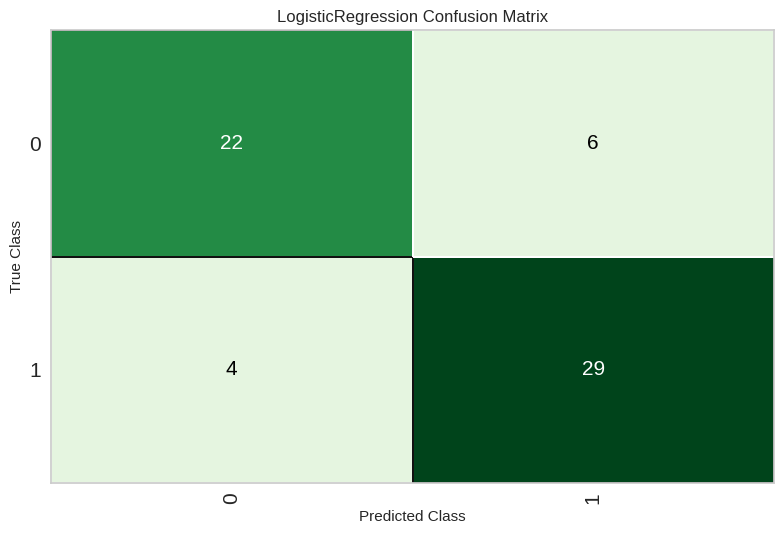

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')



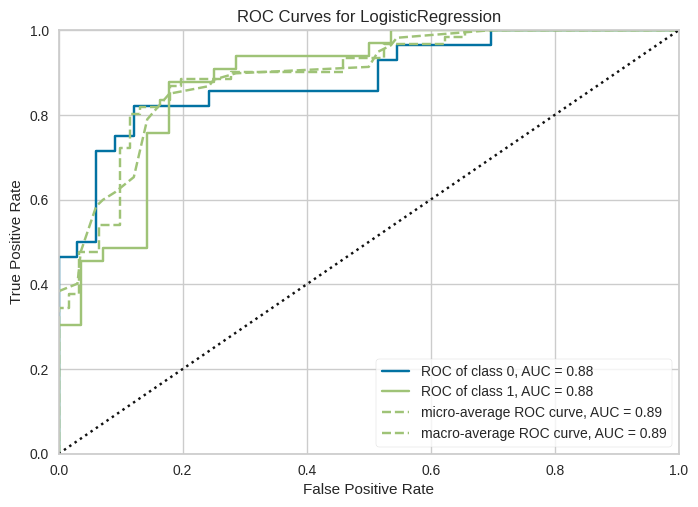

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

Predicción del Modelo


In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8361,0.8842,0.8788,0.8286,0.8529,0.6681,0.6696


In [ ]:
# show predictions df
holdout_pred.head()

,Edad,Genero,Dolor en pecho,Presión arterial reposo,Colesterol,Glucemia,Resultado ECC Reposo,Frecuencia Cardiaca,Angina por ejercicio,Depresión de ST,Pendiente ST,Numero de vasos,Talasemia,Diagnostico,prediction_label,prediction_score
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2,0,0,0.9937
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0,0,0.9970
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1,1,0.7897
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,0,0.5445
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0,0,0.8750


Crear Modelo

In [ ]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8800,0.9545,0.8571,0.9231,0.8889,0.7588,0.7613
1,0.8000,0.8442,0.7143,0.9091,0.8000,0.6057,0.6234
2,0.8750,0.9650,0.9231,0.8571,0.8889,0.7465,0.7492
3,0.8750,0.9441,1.0000,0.8125,0.8966,0.7429,0.7687
4,0.8333,0.9790,0.9231,0.8000,0.8571,0.6596,0.6693
5,0.9167,0.9930,0.9231,0.9231,0.9231,0.8322,0.8322
6,0.9167,0.9441,1.0000,0.8667,0.9286,0.8298,0.8421
7,0.5417,0.6643,0.6154,0.5714,0.5926,0.0704,0.0707
8,0.7917,0.8462,0.6923,0.9000,0.7826,0.5890,0.6078


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.9351,0.7857,0.8462,0.8148,0.5981,0.6000
1,0.7600,0.8539,0.6429,0.9000,0.7500,0.5312,0.5593
2,0.7917,0.8741,0.8462,0.7857,0.8148,0.5775,0.5795
3,0.7917,0.8566,0.7692,0.8333,0.8000,0.5833,0.5854
4,0.7917,0.9650,0.9231,0.7500,0.8276,0.5714,0.5913
5,0.8333,0.9580,0.9231,0.8000,0.8571,0.6596,0.6693
6,0.8750,0.9790,0.9231,0.8571,0.8889,0.7465,0.7492
7,0.6667,0.7657,0.7692,0.6667,0.7143,0.3191,0.3239
8,0.7917,0.9021,0.6154,1.0000,0.7619,0.5946,0.6504


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8800,0.9481,0.8571,0.9231,0.8889,0.7588,0.7613
1,0.7600,0.9026,0.7857,0.7857,0.7857,0.5130,0.5130
2,0.8750,0.9301,0.9231,0.8571,0.8889,0.7465,0.7492
3,0.8750,0.9371,1.0000,0.8125,0.8966,0.7429,0.7687
4,0.8750,0.9650,1.0000,0.8125,0.8966,0.7429,0.7687
5,0.8750,0.9441,0.9231,0.8571,0.8889,0.7465,0.7492
6,0.9167,0.9650,1.0000,0.8667,0.9286,0.8298,0.8421
7,0.6667,0.6713,0.8462,0.6471,0.7333,0.3094,0.3296
8,0.7917,0.9021,0.7692,0.8333,0.8000,0.5833,0.5854


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm']

In [ ]:
whitelist = models(type='ensemble').index.tolist()

In [ ]:
ensembled_models = compare_models(whitelist, fold = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8138,0.8896,0.8258,0.8316,0.8275,0.6253,0.6276,0.2800
et,Extra Trees Classifier,0.8138,0.8941,0.8333,0.8263,0.8294,0.6245,0.6253,0.2367
lightgbm,Light Gradient Boosting Machine,0.7932,0.8626,0.8182,0.8061,0.8104,0.5830,0.5864,0.3000
gbc,Gradient Boosting Classifier,0.7849,0.8727,0.8106,0.7977,0.8017,0.5667,0.5708,0.1500
xgboost,Extreme Gradient Boosting,0.7767,0.8688,0.8030,0.7903,0.7960,0.5495,0.5509,0.0933
ada,Ada Boost Classifier,0.7601,0.8379,0.7803,0.7795,0.7768,0.5174,0.5235,0.1567


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

Optimización de Hiperparámetros

In [ ]:
tuned_nb = tune_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8800,0.9416,0.8571,0.9231,0.8889,0.7588,0.7613
1,0.8000,0.8442,0.8571,0.8000,0.8276,0.5902,0.5922
2,0.8333,0.9580,0.9231,0.8000,0.8571,0.6596,0.6693
3,0.9167,0.9371,1.0000,0.8667,0.9286,0.8298,0.8421
4,0.8750,0.9790,1.0000,0.8125,0.8966,0.7429,0.7687
5,0.9167,0.9930,1.0000,0.8667,0.9286,0.8298,0.8421
6,0.9167,0.9441,1.0000,0.8667,0.9286,0.8298,0.8421
7,0.6250,0.6783,0.7692,0.6250,0.6897,0.2286,0.2365
8,0.8333,0.8881,0.8462,0.8462,0.8462,0.6643,0.6643


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
bestModel = automl(optimize ='AUC')

In [ ]:
print (bestModel)

GaussianNB(priors=None, var_smoothing=1)


In [ ]:
tuned_bestModel = tune_model(bestModel, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8800,0.9416,0.8571,0.9231,0.8889,0.7588,0.7613
1,0.8000,0.8442,0.8571,0.8000,0.8276,0.5902,0.5922
2,0.8333,0.9580,0.9231,0.8000,0.8571,0.6596,0.6693
3,0.9167,0.9371,1.0000,0.8667,0.9286,0.8298,0.8421
4,0.8750,0.9790,1.0000,0.8125,0.8966,0.7429,0.7687
5,0.9167,0.9930,1.0000,0.8667,0.9286,0.8298,0.8421
6,0.9167,0.9441,1.0000,0.8667,0.9286,0.8298,0.8421
7,0.6250,0.6783,0.7692,0.6250,0.6897,0.2286,0.2365
8,0.8333,0.8881,0.8462,0.8462,0.8462,0.6643,0.6643


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
print (tuned_bestModel)

GaussianNB(priors=None, var_smoothing=1)


In [ ]:
bestModel = automl(optimize ='Accuracy')

In [ ]:
tuned_bestModel = tune_model(bestModel, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8800,0.9416,0.8571,0.9231,0.8889,0.7588,0.7613
1,0.8000,0.8442,0.8571,0.8000,0.8276,0.5902,0.5922
2,0.8333,0.9580,0.9231,0.8000,0.8571,0.6596,0.6693
3,0.9167,0.9371,1.0000,0.8667,0.9286,0.8298,0.8421
4,0.8750,0.9790,1.0000,0.8125,0.8966,0.7429,0.7687
5,0.9167,0.9930,1.0000,0.8667,0.9286,0.8298,0.8421
6,0.9167,0.9441,1.0000,0.8667,0.9286,0.8298,0.8421
7,0.6250,0.6783,0.7692,0.6250,0.6897,0.2286,0.2365
8,0.8333,0.8881,0.8462,0.8462,0.8462,0.6643,0.6643


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
print (tuned_bestModel)

GaussianNB(priors=None, var_smoothing=1)


In [ ]:
bestModel = automl(optimize ='F1')

In [ ]:
tuned_bestModel = tune_model(bestModel, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8800,0.9416,0.8571,0.9231,0.8889,0.7588,0.7613
1,0.8000,0.8442,0.8571,0.8000,0.8276,0.5902,0.5922
2,0.8333,0.9580,0.9231,0.8000,0.8571,0.6596,0.6693
3,0.9167,0.9371,1.0000,0.8667,0.9286,0.8298,0.8421
4,0.8750,0.9790,1.0000,0.8125,0.8966,0.7429,0.7687
5,0.9167,0.9930,1.0000,0.8667,0.9286,0.8298,0.8421
6,0.9167,0.9441,1.0000,0.8667,0.9286,0.8298,0.8421
7,0.6250,0.6783,0.7692,0.6250,0.6897,0.2286,0.2365
8,0.8333,0.8881,0.8462,0.8462,0.8462,0.6643,0.6643


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
print (tuned_bestModel)

GaussianNB(priors=None, var_smoothing=1)


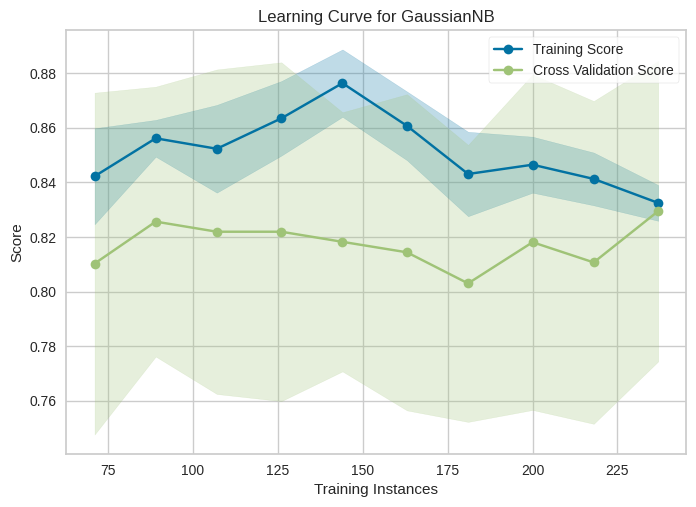

In [ ]:
plot_model(tuned_bestModel, plot ='learning')

In [ ]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8800,0.9545,0.8571,0.9231,0.8889,0.7588,0.7613
1,0.8000,0.8766,0.7857,0.8462,0.8148,0.5981,0.6000
2,0.8333,0.9371,0.9231,0.8000,0.8571,0.6596,0.6693
3,0.8750,0.9371,1.0000,0.8125,0.8966,0.7429,0.7687
4,0.8750,1.0000,1.0000,0.8125,0.8966,0.7429,0.7687
5,0.8750,0.9580,0.9231,0.8571,0.8889,0.7465,0.7492
6,0.9167,0.9650,1.0000,0.8667,0.9286,0.8298,0.8421
7,0.6667,0.6853,0.8462,0.6471,0.7333,0.3094,0.3296
8,0.8333,0.8951,0.8462,0.8462,0.8462,0.6643,0.6643


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.9351,0.7857,0.8462,0.8148,0.5981,0.6000
1,0.8000,0.8636,0.7857,0.8462,0.8148,0.5981,0.6000
2,0.7917,0.8741,0.9231,0.7500,0.8276,0.5714,0.5913
3,0.9167,0.9231,1.0000,0.8667,0.9286,0.8298,0.8421
4,0.7917,0.9720,0.9231,0.7500,0.8276,0.5714,0.5913
5,0.8333,0.9720,0.9231,0.8000,0.8571,0.6596,0.6693
6,0.8750,0.9790,0.9231,0.8571,0.8889,0.7465,0.7492
7,0.7500,0.7622,0.8462,0.7333,0.7857,0.4894,0.4966
8,0.9167,0.9441,0.8462,1.0000,0.9167,0.8345,0.8462


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Ensamble

In [ ]:
models()


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
bagged_nb = ensemble_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8800,0.9545,0.8571,0.9231,0.8889,0.7588,0.7613
1,0.7600,0.8247,0.6429,0.9000,0.7500,0.5312,0.5593
2,0.8750,0.9371,0.9231,0.8571,0.8889,0.7465,0.7492
3,0.8750,0.9371,1.0000,0.8125,0.8966,0.7429,0.7687
4,0.8333,0.9790,0.9231,0.8000,0.8571,0.6596,0.6693
5,0.9583,1.0000,0.9231,1.0000,0.9600,0.9167,0.9199
6,0.9167,0.9510,1.0000,0.8667,0.9286,0.8298,0.8421
7,0.5417,0.6783,0.6154,0.5714,0.5926,0.0704,0.0707
8,0.8333,0.8671,0.7692,0.9091,0.8333,0.6690,0.6783


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
boosted_lr = ensemble_model(lr, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8800,0.9545,0.8571,0.9231,0.8889,0.7588,0.7613
1,0.7600,0.8961,0.7857,0.7857,0.7857,0.5130,0.5130
2,0.8333,0.9510,0.9231,0.8000,0.8571,0.6596,0.6693
3,0.8750,0.9371,1.0000,0.8125,0.8966,0.7429,0.7687
4,0.8750,0.9860,1.0000,0.8125,0.8966,0.7429,0.7687
5,0.8750,0.9650,0.9231,0.8571,0.8889,0.7465,0.7492
6,0.9167,0.9580,1.0000,0.8667,0.9286,0.8298,0.8421
7,0.6250,0.6783,0.7692,0.6250,0.6897,0.2286,0.2365
8,0.8333,0.8881,0.8462,0.8462,0.8462,0.6643,0.6643


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Blend Models

In [ ]:
blender = blend_models(estimator_list = [boosted_lr, bagged_nb, tuned_lr], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8800,0.9481,0.8571,0.9231,0.8889,0.7588,0.7613
1,0.8400,0.8701,0.7857,0.9167,0.8462,0.6815,0.6903
2,0.8750,0.9510,0.9231,0.8571,0.8889,0.7465,0.7492
3,0.8750,0.9371,1.0000,0.8125,0.8966,0.7429,0.7687
4,0.8750,0.9790,1.0000,0.8125,0.8966,0.7429,0.7687
5,0.9583,1.0000,0.9231,1.0000,0.9600,0.9167,0.9199
6,0.9167,0.9510,1.0000,0.8667,0.9286,0.8298,0.8421
7,0.5417,0.6573,0.6154,0.5714,0.5926,0.0704,0.0707
8,0.8333,0.8881,0.7692,0.9091,0.8333,0.6690,0.6783


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
#Stacking

In [ ]:
stacker = stack_models(estimator_list = [boosted_lr,bagged_nb,tuned_lr], meta_model=lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8800,0.9416,0.8571,0.9231,0.8889,0.7588,0.7613
1,0.7600,0.8831,0.7857,0.7857,0.7857,0.5130,0.5130
2,0.8750,0.9301,0.9231,0.8571,0.8889,0.7465,0.7492
3,0.8750,0.9371,1.0000,0.8125,0.8966,0.7429,0.7687
4,0.8750,0.9720,1.0000,0.8125,0.8966,0.7429,0.7687
5,0.8750,0.9441,0.9231,0.8571,0.8889,0.7465,0.7492
6,0.9167,0.9650,1.0000,0.8667,0.9286,0.8298,0.8421
7,0.6667,0.6783,0.8462,0.6471,0.7333,0.3094,0.3296
8,0.7917,0.9021,0.7692,0.8333,0.8000,0.5833,0.5854


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Calibración

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8800,0.9481,0.8571,0.9231,0.8889,0.7588,0.7613
1,0.7600,0.9026,0.7857,0.7857,0.7857,0.5130,0.5130
2,0.8750,0.9301,0.9231,0.8571,0.8889,0.7465,0.7492
3,0.8750,0.9371,1.0000,0.8125,0.8966,0.7429,0.7687
4,0.8750,0.9650,1.0000,0.8125,0.8966,0.7429,0.7687
5,0.8750,0.9441,0.9231,0.8571,0.8889,0.7465,0.7492
6,0.9167,0.9650,1.0000,0.8667,0.9286,0.8298,0.8421
7,0.6667,0.6713,0.8462,0.6471,0.7333,0.3094,0.3296
8,0.7917,0.9021,0.7692,0.8333,0.8000,0.5833,0.5854


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

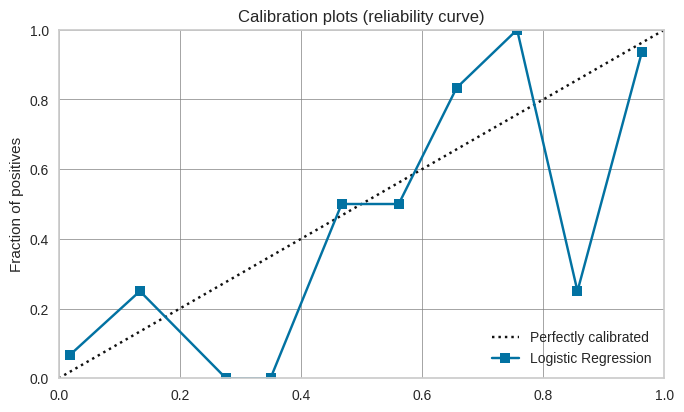

In [ ]:
lr = create_model('lr')
plot_model(lr, plot='calibration')

In [ ]:
calibrated_lr = calibrate_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8400,0.9416,0.7857,0.9167,0.8462,0.6815,0.6903
1,0.7600,0.8961,0.7857,0.7857,0.7857,0.5130,0.5130
2,0.8750,0.9301,0.9231,0.8571,0.8889,0.7465,0.7492
3,0.8750,0.9371,1.0000,0.8125,0.8966,0.7429,0.7687
4,0.8750,0.9650,1.0000,0.8125,0.8966,0.7429,0.7687
5,0.8750,0.9441,0.9231,0.8571,0.8889,0.7465,0.7492
6,0.9167,0.9650,1.0000,0.8667,0.9286,0.8298,0.8421
7,0.6667,0.6713,0.8462,0.6471,0.7333,0.3094,0.3296
8,0.7917,0.9021,0.7692,0.8333,0.8000,0.5833,0.5854


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

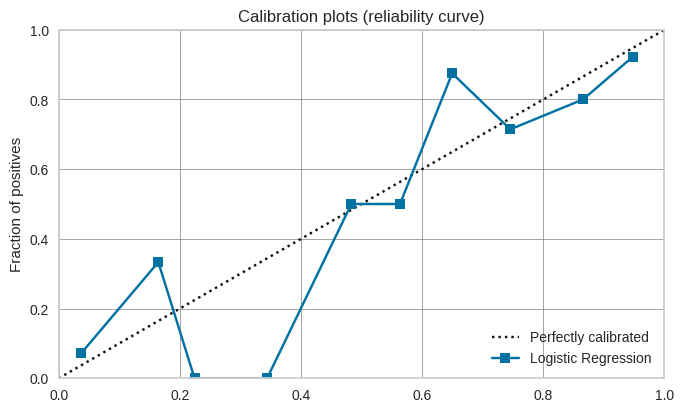

In [ ]:
plot_model(calibrated_lr, plot='calibration')

Analisis del Modelo

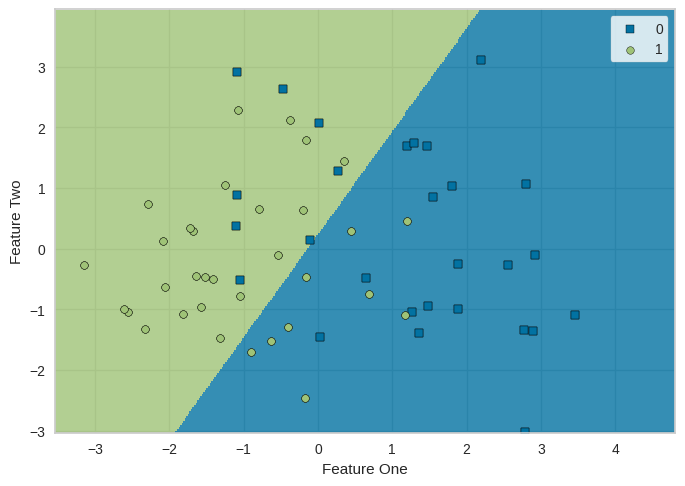

In [ ]:
plot_model(lr, plot = 'boundary')

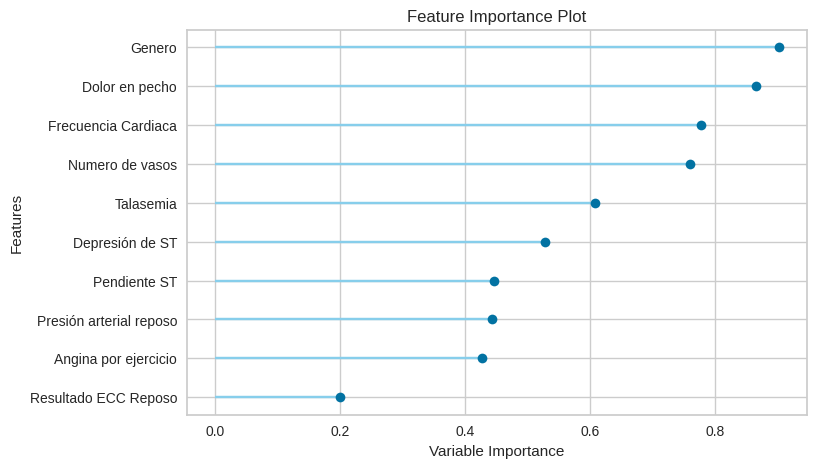

In [ ]:
plot_model(lr, plot = 'feature')

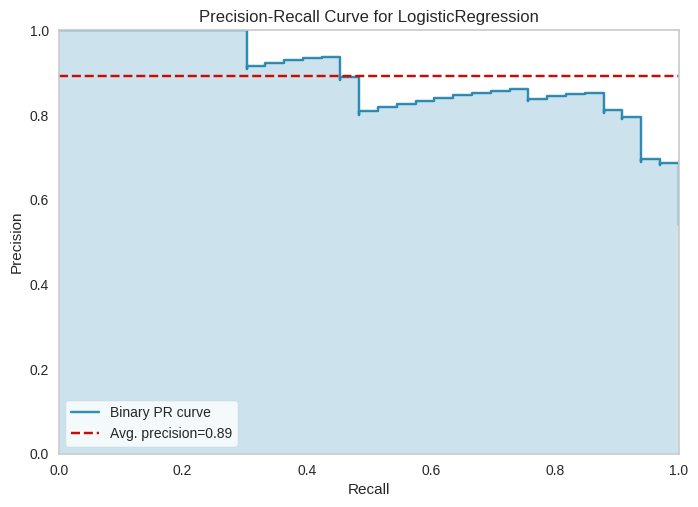

In [ ]:
plot_model(lr, plot = 'pr')

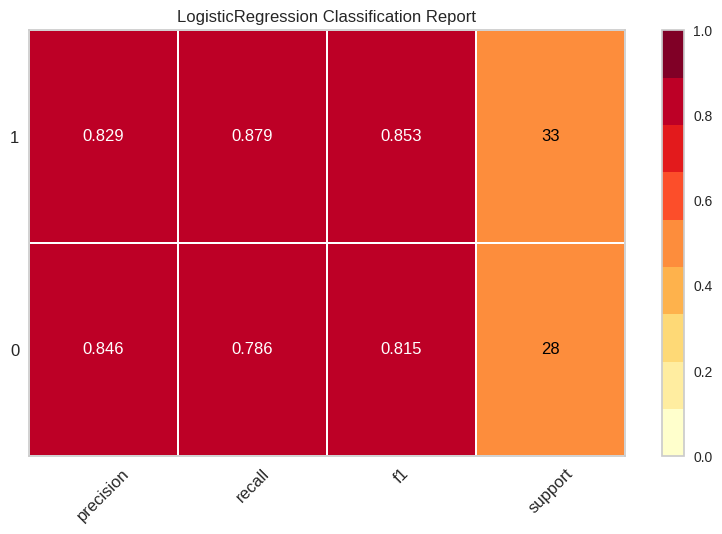

In [ ]:
plot_model(lr, plot = 'class_report')

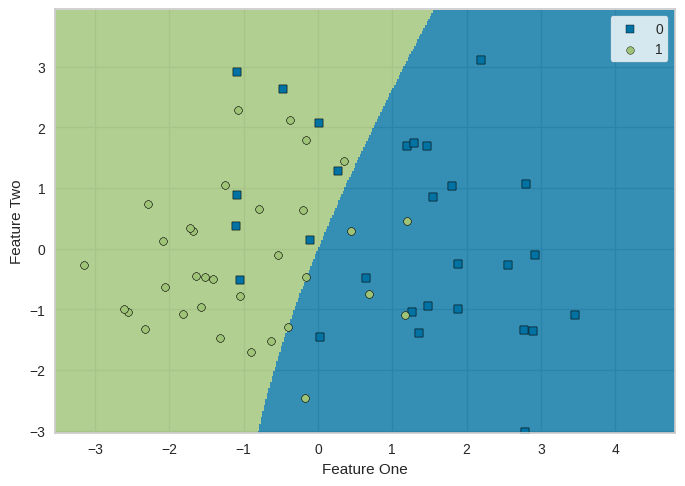

In [ ]:
plot_model(nb, plot = 'boundary')

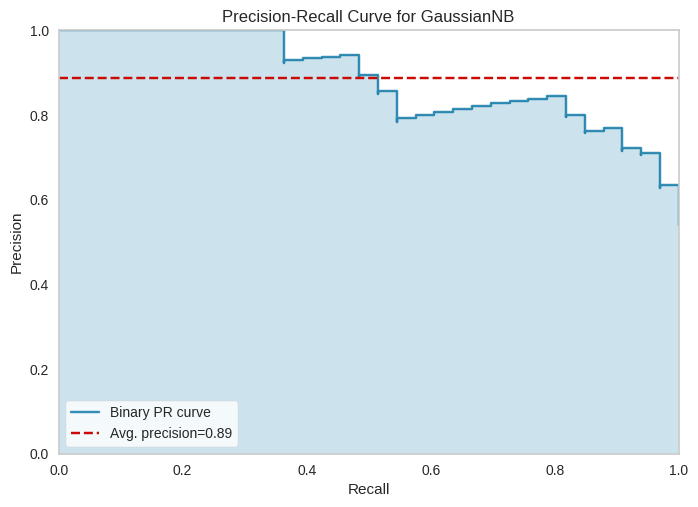

In [ ]:
plot_model(nb, plot = 'pr')

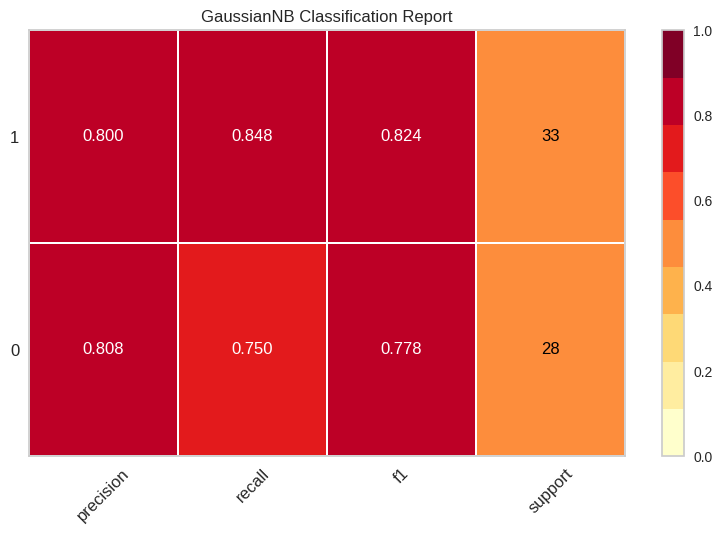

In [ ]:
plot_model(nb, plot = 'class_report')

Interpretación del modelo

In [ ]:
# Finalización del modelo
final_model = finalize_model (tuned_bestModel)

In [ ]:
print (final_model)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Edad', 'Genero', 'Dolor en pecho',
                                             'Presión arterial reposo',
                                             'Colesterol', 'Glucemia',
                                             'Resultado ECC Reposo',
                                             'Frecuencia Cardiaca',
                                             'Angina por ejercicio',
                                             'Depresión de ST', 'Pendiente ST',
                                             'Numero de vasos', 'Talasemia'],
                                    transformer=SimpleImputer(add_indicator=Fa...
                                                                              sampling_strategy='auto')))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
 

In [ ]:
save_model(final_model,'FinalModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Edad', 'Genero', 'Dolor en pecho',
                                              'Presión arterial reposo',
                                              'Colesterol', 'Glucemia',
                                              'Resultado ECC Reposo',
                                              'Frecuencia Cardiaca',
                                              'Angina por ejercicio',
                                              'Depresión de ST', 'Pendiente ST',
                                              'Numero de vasos', 'Talasemia'],
                                     transformer=SimpleImputer(add_indicator=Fa...
                                                                               sampling_strategy='auto')))),
                 ('normalize',
                  TransformerWrapper(exclude=None, 

In [ ]:
pip list